# The Sparks Foundation

# Task 1: Prediction Using Supervised Machine Learning

In this notebook, we will predict the score based on hours they are reading. Te process we will follow is this:<br>
<br>
1) Import important libraries such as pandas, numpy for mathematical approach and for data visualization we will import libraries as matplotlib.pyplot and seaborn.<br>
2) Then we will read the data from given link https://www.google.com/url?sa=D&q=http://bit.ly/w-data&ust=1602310440000000&usg=AOvVaw3dWIh4sNbW684d5Jgkbhxl&hl=en.<br>
3) After that we will get the statistics of the data and find if there are any null values in the data.<br>
4) Now we will visualize the data using matplotlib and seaborn for finding any outliers if there is any.<br>
5) Using scatter plot we will visualize the relation between hours and scores.<br>
For training purpose we have taken two different approach here:<br>
<center>1) Without using inbuilt functions and libraries<br>
2) Using in-built functions and libraries<br></center>
<br>
The model 1 approach is as following:<br>
 


# Model 1 Approach
<br>
A linear line relationship between one input/independent variable(X) and one output/dependent variable(y).

     y = mX + b
Where, y is dependent/target variable; X is input/independent variable; m is slop of regression line; b is y-intercept.


The model is built in the following steps 

- **Data Wrangling**
- **Data Cleaning : Missing Values** 
- **Visualisation : UniVariate** 
    
      - Histograms
      - Scatter Plot 
      - Boxplot
      
- **Parameter Functions :**
      
      - Mean and Variance
      - Co-Variance
      - Coefficients
      - Splitting Test Data
      
- **Model Building and Predictions**

- **RMSE Function building and calculation**




## `1.` Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [43]:
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.shape

(25, 2)

## `2.` Data Cleaning 

**Getting info about dataset using `info()` method**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Describing the dataset**

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Removing instances with missing values**

In [6]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

## `3.` Visualization of train dataset

### `3.1` Histograms

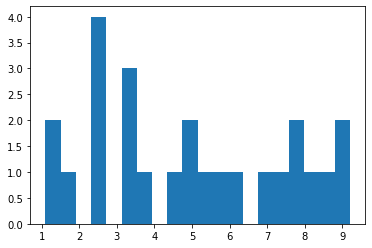

In [7]:
plt.hist(data['Hours'], bins = 20)
plt.show()

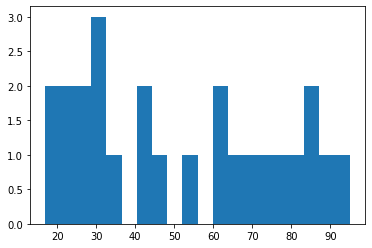

In [8]:
plt.hist(data['Scores'], bins = 20)
plt.show()

### `3.2` Boxplots 

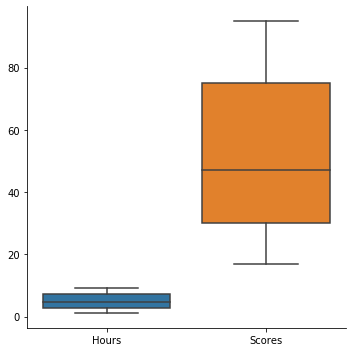

In [9]:
sb.catplot(kind = 'box', data = data)

### `3.3` Scatter Plot

Text(0.5, 1.0, 'Hours vs Percentage')

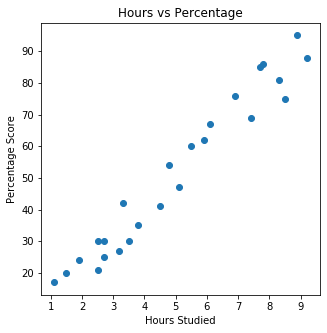

In [10]:
plt.figure(figsize = (5, 5))
plt.scatter(data['Hours'], data['Scores'])
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.title('Hours vs Percentage')


**Split the `dependent` and `independent` variable and name them `y` and `X` respectively**

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = data['Hours']
y = data['Scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### `4`       Let's start Implementation
    1. Calculate Mean and Variance
    2. Calculate Covariance.
    3. Estimate Coefficients.
    4. Make prediction
    5. Evaluating Model with RMSE

### `4.1`   Mean and Variance 
Mean of numbers can be calculated as: -

    mean(x) = sum(x) / count(x)

In [13]:
def mean(x):
     
    return sum(x) / len(x)

#Calculate varience of list numbers with variance function

def variance(x):
    return sum((i - mean(x))**2 for i in x) / len(x)
               

In [14]:
X_mean = mean(X_train)
y_mean = mean(y_train)
X_variance = variance(X_train)
y_variance = variance(y_train)

### `4.2` Calculate Covariance
covariance can describe the relationship between two or more groups of numbers. It is a generalization of correlation. Correlation describes the relationship between two groups of numbers.

you can calculate the covariance between two variables as follows:

       covariance = sum((x(i) - mean(x)) * (y(i) - mean(y)))

In [15]:
X_new = X_train.to_numpy(dtype = 'int32')
y_new = y_train.to_numpy(dtype = 'int32')

def covariance(a, b):
    
    if len(a) != len(b):
        return   
    
    sum1 = 0
    for i in range(0, len(a)):
        a_mean = mean(a)
        b_mean = mean(b)
        sum1 += (a[i] - a_mean) * (b[i] - b_mean)
    
    return sum1 / (len(a) - 1)

covariance(X_new, y_new)

59.9921052631579

### `4.3` Coefficients
Estimate two coefficients in simple linear regression. which is m and b.

    m = covariance() / variance(X)
    b = mean(y) - (m*mean(X))

In [16]:
def coefficients(z, w):
    m = covariance(z, w) / variance(z)
    b = mean(w) - (m * mean(z))
    return m, b

#Lets estimate with coefficient

print('The Slope of line is:', coefficients(X_new, y_new)[0], '& The y-intercept of line is:', coefficients(X_new, y_new)[1])    


The Slope of line is: 10.622772069616271 & The y-intercept of line is: 3.3163870832459637


## `5.` Linear Regression Model and Predictions

**Make a function to evaluate `linear_regression` with above calculated parameters**

Use the formula Y= mX + c

In [17]:
def simple_linear_regression(p, q):
    y_pred = []
    m, b = coefficients(p, q)
    for i in range(len(p)):
        y_hat = (coefficients(p, q)[0] * p[i] + coefficients(p, q)[1])
        y_pred.append(y_hat)
    return y_pred

In [18]:
X_test = X_test.to_numpy(dtype = 'int32')
y_test = y_test.to_numpy(dtype = 'int32')

**Make a line plot of the predictions and a scatter plot of the dataset**

In [19]:
predict = simple_linear_regression(X_test, y_test)

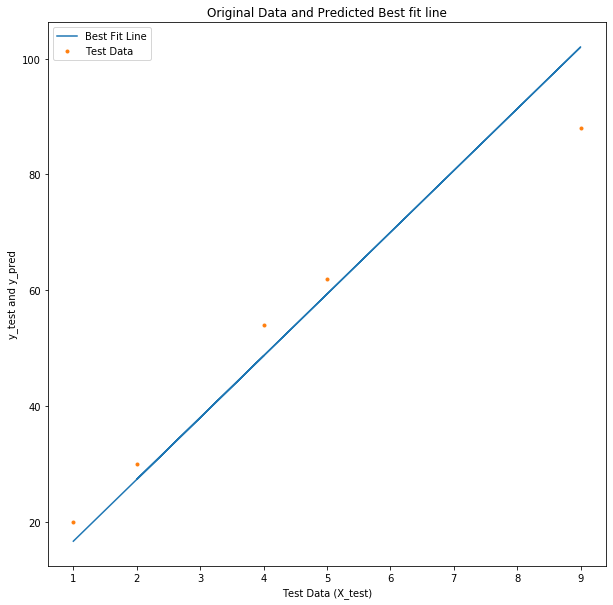

In [20]:
plt.figure(figsize = (10, 10))
_=plt.plot(X_test,predict, label = 'Best Fit Line')

# Ploting Scatter Points

_=plt.plot(X_test,y_test,marker=".",linestyle='none', label = 'Test Data')
plt.xlabel('Test Data (X_test)')
plt.ylabel('y_test and y_pred')
plt.title('Original Data and Predicted Best fit line')
plt.legend()
plt.show()

## `6.` RMSE Function Building and Calculation
We need to find how good is our model. There are many methods to evaluate models. Here we will use **Root Mean Sqare Error** 

**Root Mean Sqare Error** is the square root of the sum of all errors divided by the number of values.
![RMSE](https://cdn-images-1.medium.com/max/800/1*SGBsn7WytmYYbuTgDatIpw.gif)

Here yhat is the ith predicted output values or simply yhat = mX + c


**Make `Root_mean_square_error` function**

In [23]:
def RMSE(r, s):
    if len(r) != len(s):
        return
    for i in range(0, len(r)):
        rmse = np.sqrt((np.sum(r[i] -s[i])**2) / len(r))
    return(rmse)

In [24]:
print(RMSE(y_test, predict))

1.4956297977338842


# Model 2 Approach

### `1.` Data Splitting

In [25]:
X_1 = data.iloc[:, :-1].values
y_1 = data.iloc[:, 1].values
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1= train_test_split(X_1, y_1,test_size = 0.2)

### `2.` Training

In [26]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [27]:
lin_reg.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### `3.` Predicting

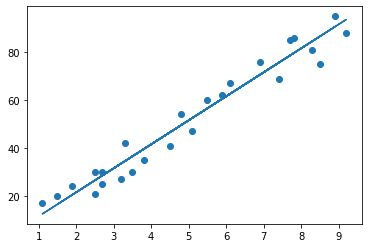

In [28]:
line = (lin_reg.coef_)*X_1 + lin_reg.intercept_
plt.scatter(X_1, y_1)
plt.plot(X_1, line)

In [29]:
y_pred = lin_reg.predict(X_test1)

In [30]:
comparision = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred})  
comparision

,Actual,Predicted
0,75,86.599388
1,85,78.587733
2,20,16.497407
3,24,20.503234
4,30,36.526544


In [31]:
hours = np.array([[9.25]])
score_pred = lin_reg.predict(hours)

print("If someone reads for", hours,"the predicted percentage score he or she will recieve will be ", score_pred[0])

If someone reads for [[9.25]] the predicted percentage score he or she will recieve is  94.11031446425626


### `4.` RMSE 

In [32]:
print(RMSE(y_test1, y_pred))

2.918759376138901
